# Generador del Dataset

- Se utiliza un controlador Difuso Mamdani para generar el dataset

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.fis import *
fis =fis()

In [3]:
cat1=["Cuando estés muy lejos de la pared, pero te estás acercando a ella, gira tu rueda izquierda rápidamente hacia delante, y gira tu rueda derecha muy lento hacia atrás",
"si te estas acercando a la pared, pero aún estás demasiado lejos de ella, gira tu rueda izquierda rápidamente hacia adelante y la rueda derecha lentamente hacia atrás.",
"En caso de estar muy lejos de la pared y estás acercándote, gira rápidamente la rueda izquierda hacia delante mientras giras la rueda derecha hacia atrás, pero de manera lenta",
"En el caso de estar demasiado lejos de la pared y estás acercándote a ella, gira rápidamente la rueda izquierda hacia delante y la rueda derecha hacia atrás de manera lenta"]

cat2=["Cuando estés lejos de la pared, pero te estás acercando a ella, gira tu rueda izquierda medio rápido hacia delante, y gira tu rueda derecha muy lento hacia delante.",
"si te estás acercando a la pared pero aún estás lejos, gira tu rueda izquierda más o menos rápido hacia adelante y la derecha muy lento adelante ",
"en caso de que te estes acercando al pared pero aún estés lejos, gira tu rueda izquierda algo rápido hacía adelante y la rueda izquierda muy lento hacía adelante ",
"en caso de estar lejos de la pared pero te estés acercando, gira tu rueda izquierda medio rápido hacia adelante y la rueda izquierda muy lento hacia adelante "]

cat3=["Cuando estés a la distancia requerida, pero te estás acercando a la pared, gira tu rueda izquierda muy lento hacia atrás, y gira tu rueda derecha rápidamente hacia delante",
"si estas en la distancia que es, pero te vas acercando a ella, debes girar tu rueda izquierda muy lento hacia atrás y tu rueda derecha rápidamente hacia adelante",
"en caso de que te estés acercando mientras estés a la distancia requerida, gira tu rueda izquierda muy lento hacia atrás mientras giras la derecha rápidamente hacia adelante",
"si te estas acercando y estás a la distancia requerida, gira tu rueda izquierda muy lento hacia atrás mientras giras la rueda derecha rápidamente hacia adelante"]

cat4=["Cuando estés cerca a la pared, y te estás acercando más a ella, gira tu rueda izquierda muy rápido hacia atrás, y gira tu rueda derecha muy rápido hacia delante.",
"si te estás acercando a la pared estando cerca de ella, gira tu rueda izquierda muy rápido hacia atrás y tu rueda derecha muy rápido hacia adelante",
"si estás en la distancia requerida y te estás acercando a ella, debes girar tu rueda izquierda muy rápido hacía atrás mientas giras la derecha muy rápido hacía adelante",
"cuando te estes acercando a la pared, pero estás a la distancia requerida, debes girar tu rueda izquierda muy rápido hacia atrás y la rueda derecha muy rápido hacia adelante"]

cat5=["Cuando estés muy cerca a la pared, y te estás acercando aún más a ella, gira tu rueda izquierda despacito hacia atrás, y gira tu rueda derecha despacito hacia atrás.",
"si te estás acercando a la pared, pero ya estás muy cerca de ella, gira tu rueda izquierda y derecha despacito hacía atrás",
"si estás muy cerca a la pared y sigues acercándote a ella, gira tus dos ruedas despacito hacia atrás",
"en caso de que estés muy cerca a la pared y te sigas acercando, gira tu rueda izquierda despacito hacía atrás, al igual que la derecha "]

cat6=["Cuando estés muy lejos de la pared, pero ni te alejas más ni te acercas a ella, gira tu rueda izquierda bastante rápido hacia delante, y gira tu rueda derecha despacito hacia atrás",
"Cuando estás muy lejos de la pared y no te acercas, pero tampoco te alejas, gira tu rueda izquierda bastante rápido hacia adelante y la derecha despacito hacia atrás",
"En caso de que no te estés acercando ni alejando de la pared y además estas muy lejos de ella, despacito hacía atrás gira tu rueda derecha mientras la rueda izquierda va bastante rápido hacia adelante",
"si estás muy lejos de la pared y no te acercas y ni te alejas, gira tu rueda izquierda bastante rápido hacía adelante "]

cat7=["Cuando estés lejos de la pared, pero ni te alejas más ni te acercas a ella, gira tu rueda izquierda rápidamente hacia delante, y gira tu rueda derecha muy lento hacia atrás.",
"Si no te acercas y ni te alejas, pero estás lejos de la pared, gira tu rueda derecha muy lento hacia atrás, pero la izquierda muy rápidamente hacia adelante  ",
"en caso de que estés lejos de la pared y no te estes acercando ni alejando de ella, gira tu rueda izquierda hacia adelante rápidamente mientras la derecha la giras muy lento hacia atrás",
"cuando no te estés alejando ni acercando a la pared pero aún estás lejos, gira la rueda derecha muy lento hacía atrás y la izquierda rápidamente hacia adelante"]

cat8=["Cuando estés a la distancia requerida, y ni te alejas ni te acercas a ella, gira tu rueda izquierda despacito hacia delante, y gira tu rueda derecha despacito hacia delante.",
"cuando estén a la distancia que es, y ni te acercas o alejas de la pared, vas a girar la rueda izquierda despacito hacia adelante, y tu rueda derecha despacito hacía delante",
"si no te acercas ni te alejas di la pared y estás a la distancia correcta, gira tu rueda izquierda y derecha despacito hacia delante",
"en caso de que estés a la distancia requerida de la pared y no te estes acercando ni alejando de ella, debes girar las dos ruedas despacito hacia adelante"]

cat9=["Cuando estés cerca a la pared, pero ni te acercas más ni te alejas de ella, gira tu rueda izquierda bastante rápido hacia atrás, y gira tu rueda derecha bastante rápido hacia delante.",
"en caso de estar cerca a la pared y no te acercas ni te alejas de ella, bastante rápido hacia atrás vas a girar tu rueda izquierda, igualmente tu rueda derecha pero hacia adelante",
"si no te alejas ni te acercas a la pared, pero estás cerca de ella, debes girar bastante rápido tu rueda derecha hacia delante e igualmente tu rueda izquierda pero hacia atrás",
"cuando estés cerca de la pared y no te alejas de ella, pero tampoco te acercas, debes girar tu rueda derecha bastante rápido hacia adelante y la izquierda igualmente hacia atrás"]

cat10=["Cuando estés muy cerca a la pared, pero ni te acercas más ni te alejas de ella, gira tu rueda izquierda despacito hacia atrás, y gira tu rueda derecha despacito hacia atrás.",
"Si estás muy cerca a la pared pero no te acercas hacia ella ni te alejas de ella, debes girar despacito la rueda izquierda hacia atrás y la rueda derecha hacia atrás de la misma manera.",
"Cuando te encuentres muy cerca a la pared sin acercarte ni alejarte de ella, es necesario que gires despacito la rueda izquierda hacia atrás y la rueda derecha de la misma manera",
"Si te encuentras muy cerca a la pared sin acercarte ni alejándote, debes girar despacito la rueda izquierda hacia atrás y la rueda derecha de la misma manera hacia atrás."]

cat11=["Cuando estés muy lejos de la pared, y te estás alejando aun más de ella, gira tu rueda izquierda muy rápido hacia delante, y gira tu rueda derecha más o menos rápido hacia atrás.",
"si te estás alejando de la pared y aún te encuentras muy lejos de ella, gira tu rueda izquierda muy rápido hacia delante y tu rueda derecha más o menos rápido hacia atrás",
"si te encuentras muy lejos de la pared y sigues alejándote de ella, gira tu rueda izquierda muy rápido hacia adelante y tu rueda derecha hacia atrás más o menos rápido ",
"en caso de estar muy lejos y sigues alejándote de la pared, debes girar tu rueda izquierda muy rápido hacia adelante y tu rueda derecha más o menos rápido hacia atrás"]

cat12=["Cuando estés lejos de la pared, y te estás alejando más de ella, gira tu rueda izquierda bastante rápido hacia delante, y gira tu rueda derecha despacito hacia atrás.",
"Si te encuentras lejos de la pared y te alejas cada vez más de ella, debes girar la rueda izquierda bastante rapidez hacia adelante, mientras que giras la rueda derecha hacia atrás despacito",
"en caso de que te alejes de la pared y te encuentres lejos de ella, debes girar la rueda izquierda bastante rápido hacia adelante y la derecha despacito hacia atrás",
"si estás lejos de la pared y te sigues alejando de ella, debes girar bastante rápido hacia adelante tu rueda izquierda y tu rueda derecha despacito hacia atrás"]

cat13=["Cuando estés a la distancia requerida, pero te estás alejando de la pared, gira tu rueda izquierda rápidamente hacia delante, y gira tu rueda derecha muy lento hacia atrás.",
"cuando estén a la distancia que es, y te estás alejando de la pared, vas a girar la rueda izquierda rápidamente hacia adelante, y tu rueda derecha muy lento hacia atrás",
"si te estás alejando pared y estás a la distancia correcta, gira tu rueda derecha muy lento hacia atrás mientras la izquierda la giras rápidamente hacia delante",
"en caso de que estés a la distancia requerida de la pared y te estés alejando de ella, debes girar rápidamente hacia adelante la rueda derecha y muy lento hacia atrás la rueda izquierda"]
cat14=["Cuando estés cerca a la pared, pero te estás alejando de ella, gira tu rueda izquierda muy lento hacia delante, y gira tu rueda derecha medio rápido hacia delante",
"en caso de estar cerca a la pared y te estás alejando de ella, gira muy lento hacia delante tu rueda izquierda y tu rueda derecha medio rápido hacia delante",
"si te alejas de la pared, pero estás cerca de ella, debes girar medio rápido tu rueda derecha hacia delante mientras tu rueda izquierda muy lento hacia atrás",
"cuando estés cerca de la pared y te alejas de ella, debes girar tu rueda derecha medio rápido hacia adelante y la izquierda muy lento hacia atrás"]

cat15=["Cuando estés muy cerca a la pared, pero te estás alejando de ella, gira tu rueda izquierda despacito hacia atrás, y gira tu rueda derecha despacito hacia atrás",
"Si estás muy cerca a la pared y te alejas de ella, debes girar despacito la rueda izquierda hacia atrás y la rueda derecha de la misma manera.",
"Cuando te encuentres muy cerca a la pared y te estás alejando de ella, es necesario que gires despacito la rueda izquierda hacia atrás y la rueda derecha de la misma manera",
"Si te encuentras muy cerca de la pared y estás alejándote, debes girar despacito la rueda izquierda hacia atrás y la rueda derecha de la misma manera hacia atrás"]

In [4]:
prop = np.arange(-1.02,1.01,0.0007)
der = np.arange(-1.02,1.01,0.0007)
sal_mot = np.arange(-1.07,1.07,0.0007)

C:\Users\leand\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


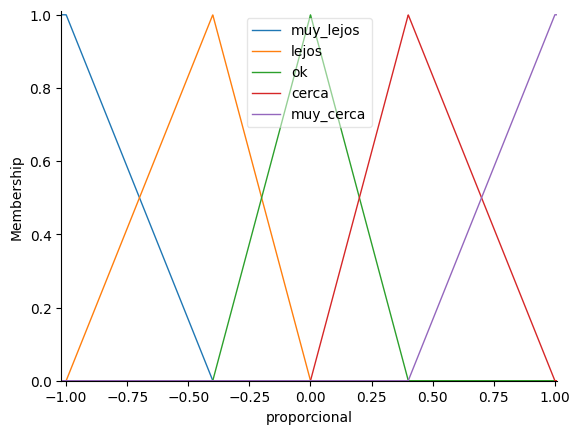

In [5]:
proporcional = ctrl.Antecedent(prop, 'proporcional')

proporcional['muy_lejos'] = fuzz.trapmf(proporcional.universe, [-6, -4, -1, -0.4])
proporcional['lejos'] = fuzz.trapmf(proporcional.universe, [-1, -0.4, -0.4, 0])
proporcional['ok'] = fuzz.trapmf(proporcional.universe, [-0.4, 0, 0, 0.4])
proporcional['cerca'] = fuzz.trapmf(proporcional.universe, [0, 0.4, 0.4, 1])
proporcional['muy_cerca'] = fuzz.trapmf(proporcional.universe, [0.4, 1, 4, 6])
proporcional.view()

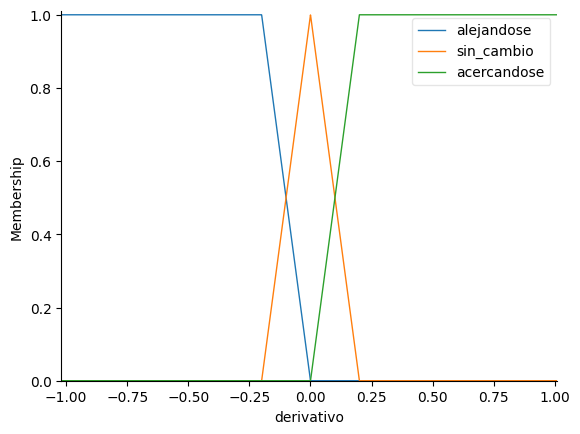

In [6]:
# Se define la variable de entrada Derivativo
derivativo = ctrl.Antecedent(der, 'derivativo')
derivativo['alejandose'] = fuzz.trapmf(derivativo.universe, [-6,-4,-0.2, 0])
derivativo['sin_cambio'] = fuzz.trapmf(derivativo.universe, [-0.2, 0, 0, 0.2])
derivativo['acercandose'] = fuzz.trapmf(derivativo.universe, [0, 0.2, 4, 6])
derivativo.view()


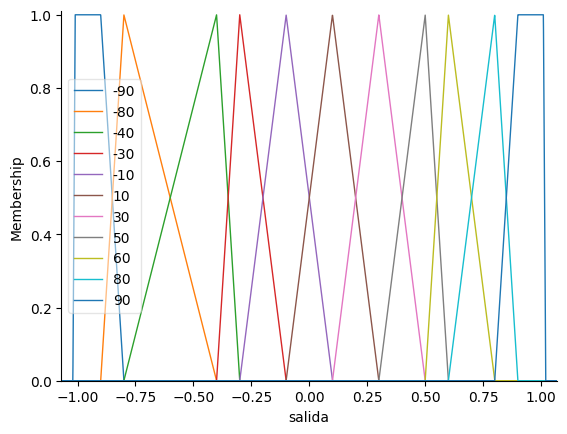

In [7]:
# Se define la variable de salida aire acondicionado
salida = ctrl.Consequent(sal_mot, 'salida')
salida['-90'] = fuzz.trapmf(salida.universe, [-1.02,-1.01,-0.90,-0.80])
salida['-80'] = fuzz.trapmf(salida.universe, [-0.90,-0.80,-0.80,-0.40])
salida['-40'] = fuzz.trapmf(salida.universe, [-0.80,-0.40,-0.40,-0.30])
salida['-30'] = fuzz.trapmf(salida.universe, [-0.40,-0.30,-0.30,-0.10])
salida['-10'] = fuzz.trapmf(salida.universe, [-0.30,-0.10,-0.10,0.10])
salida['10'] = fuzz.trapmf(salida.universe, [-0.10,0.10,0.10,0.30])
salida['30'] = fuzz.trapmf(salida.universe, [0.10,0.30,0.30,0.50])
salida['50'] = fuzz.trapmf(salida.universe, [0.30,0.50,0.50,0.60])
salida['60'] = fuzz.trapmf(salida.universe, [0.50,0.60,0.60,0.80])
salida['80'] = fuzz.trapmf(salida.universe, [0.60,0.80,0.80,0.90])
salida['90'] = fuzz.trapmf(salida.universe, [0.80,0.90,1.01,1.02])
salida.view()

In [8]:

# Se define las reglas del sistema de inferencia
Lrule1 = ctrl.Rule(proporcional['muy_lejos'] & derivativo['acercandose'],salida['60'] )
Lrule2 = ctrl.Rule(proporcional['muy_lejos'] & derivativo['sin_cambio'],salida['80'] )
Lrule3 = ctrl.Rule(proporcional['muy_lejos'] & derivativo['alejandose'],salida['90'] )
Lrule4 = ctrl.Rule(proporcional['lejos'] & derivativo['acercandose'],salida['50'] )
Lrule5 = ctrl.Rule(proporcional['lejos'] & derivativo['sin_cambio'],salida['60'] )
Lrule6 = ctrl.Rule(proporcional['lejos'] & derivativo['acercandose'],salida['80'] )
Lrule7 = ctrl.Rule(proporcional['ok'] & derivativo['acercandose'],salida['-10'] )
Lrule8 = ctrl.Rule(proporcional['ok'] & derivativo['sin_cambio'],salida['30'] )
Lrule9 = ctrl.Rule(proporcional['ok'] & derivativo['alejandose'],salida['60'] )
Lrule10 =ctrl.Rule(proporcional['cerca'] & derivativo['acercandose'],salida['-90'] )
Lrule11 = ctrl.Rule(proporcional['cerca'] & derivativo['sin_cambio'],salida['-80'] )
Lrule12 = ctrl.Rule(proporcional['cerca'] & derivativo['alejandose'],salida['10'] )
Lrule13 = ctrl.Rule(proporcional['muy_cerca'] & derivativo['acercandose'],salida['-30'] )
Lrule14 = ctrl.Rule(proporcional['muy_cerca'] & derivativo['sin_cambio'],salida['-30'] )
Lrule15 = ctrl.Rule(proporcional['muy_cerca'] & derivativo['alejandose'],salida['-30'] )

Lrules = [Lrule1, Lrule2, Lrule3, Lrule4, Lrule5, Lrule6, Lrule7, Lrule8, Lrule9, Lrule10, Lrule11, Lrule12, Lrule13, Lrule14, Lrule15]



In [9]:
Rrule1 = ctrl.Rule(proporcional['muy_lejos'] & derivativo['acercandose'],salida['-10'] )
Rrule2 = ctrl.Rule(proporcional['muy_lejos'] & derivativo['sin_cambio'],salida['-30'] )
Rrule3 = ctrl.Rule(proporcional['muy_lejos'] & derivativo['alejandose'],salida['-40'] )
Rrule4 = ctrl.Rule(proporcional['lejos'] & derivativo['acercandose'],salida['10'] )
Rrule5 = ctrl.Rule(proporcional['lejos'] & derivativo['sin_cambio'],salida['-10'] )
Rrule6 = ctrl.Rule(proporcional['lejos'] & derivativo['acercandose'],salida['-30'] )
Rrule7 = ctrl.Rule(proporcional['ok'] & derivativo['acercandose'],salida['60'] )
Rrule8 = ctrl.Rule(proporcional['ok'] & derivativo['sin_cambio'],salida['30'] )
Rrule9 = ctrl.Rule(proporcional['ok'] & derivativo['alejandose'],salida['-10'] )
Rrule10 =ctrl.Rule(proporcional['cerca'] & derivativo['acercandose'],salida['90'] )
Rrule11 = ctrl.Rule(proporcional['cerca'] & derivativo['sin_cambio'],salida['80'] )
Rrule12 = ctrl.Rule(proporcional['cerca'] & derivativo['alejandose'],salida['50'] )
Rrule13 = ctrl.Rule(proporcional['muy_cerca'] & derivativo['acercandose'],salida['-30'] )
Rrule14 = ctrl.Rule(proporcional['muy_cerca'] & derivativo['sin_cambio'],salida['-30'] )
Rrule15 = ctrl.Rule(proporcional['muy_cerca'] & derivativo['alejandose'],salida['-30'] )

Rrules = [Rrule1, Rrule2,Rrule3, Rrule4, Rrule5, Rrule6, Rrule7, Rrule8, Rrule9, Rrule10, Rrule11, Rrule12, Rrule13, Rrule14, Rrule15]


In [10]:
# Se crea el sistema de control
L = ctrl.ControlSystem(Lrules)
R = ctrl.ControlSystem(Rrules)

# Se simula el sistema de control
simulacionL = ctrl.ControlSystemSimulation(L)
simulacionR = ctrl.ControlSystemSimulation(R)

In [11]:
valoresP=np.empty((0,))
for i in range(3):
    random_numbers_1 = np.random.uniform(-1, -0.89, 666)
    random_numbers_2 = np.random.uniform(-0.52, -0.33, 666)
    random_numbers_3 = np.random.uniform(-0.08, 0.08, 667)
    random_numbers_4 = np.random.uniform(0.33, 0.52, 667)
    random_numbers_5 = np.random.uniform(0.89, 1, 667)
    valoresP = np.concatenate((valoresP,np.concatenate([random_numbers_1, random_numbers_2,random_numbers_3,random_numbers_4,random_numbers_5])))

In [12]:
random_numbers_6 = np.random.uniform(-1, -0.16, 3333)
random_numbers_7 = np.random.uniform(-0.04, 0.04, 3333)
random_numbers_8 = np.random.uniform(0.16, 1, 3333)
valoresD = np.concatenate([random_numbers_6, random_numbers_7,random_numbers_8])

In [13]:
mot_l = []
for i in range(len(valoresP)):
    simulacionL.input['proporcional'] = valoresP[i]
    simulacionL.input['derivativo'] = valoresD[i]
    simulacionL.compute()
    mot_l.append(simulacionL.output['salida'])


In [14]:
mot_r = []
for i in range(len(valoresP)):
    simulacionR.input['proporcional'] = valoresP[i]
    simulacionR.input['derivativo'] = valoresD[i]
    simulacionR.compute()
    mot_r.append(simulacionR.output['salida'])

In [15]:
from sklearn.utils import shuffle
valoresP = pd.DataFrame(valoresP, columns=['P'])
valoresD = pd.DataFrame(valoresD, columns=['D'])
mot_l = pd.DataFrame(mot_l, columns=['L'])
mot_r = pd.DataFrame(mot_r, columns=['R'])

dataset = shuffle(pd.concat([valoresP, valoresD, mot_l, mot_r], axis=1))


In [16]:
def categorize(row,style:str='wide'):
    
    if style == 'narrow':
        al_idx = 0
    elif style == 'wide':
        al_idx = np.random.randint(4)
    else:
        raise 'No valid style of categorize'


    result =''
    if row['P'] >= -1 and row['P'] <= -0.89 and row['D'] >= 0.16 and row['D'] <= 1:
        result =  cat1[al_idx]
    
    elif row['P'] >= -0.52 and row['P'] <= -0.33 and row['D'] >= 0.16 and row['D'] <= 1:
        result =  cat2[al_idx]
    
    elif row['P'] >= -0.08 and row['P'] <= 0.08 and row['D'] >= 0.16 and row['D'] <= 1:
        result =  cat3[al_idx]
    
    elif row['P'] >= 0.33 and row['P'] <= 0.52 and row['D'] >= 0.16 and row['D'] <= 1:
        result =  cat4[al_idx]
    
    elif row['P'] >= 0.89 and row['P'] <= 1 and row['D'] >= 0.16 and row['D'] <= 1:
        result =  cat5[al_idx]
    
    elif row['P'] >= -1 and row['P'] <= -0.89 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  cat6[al_idx]
    
    elif row['P'] >= -0.52 and row['P'] <= -0.33 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  cat7[al_idx]
    
    elif row['P'] >= -0.08 and row['P'] <= 0.08 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  cat8[al_idx]
    
    elif row['P'] >= 0.33 and row['P'] <= 0.52 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  cat9[al_idx]
    
    elif row['P'] >= 0.89 and row['P'] <= 1 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  cat10[al_idx]
    
    elif row['P'] >= -1 and row['P'] <= -0.89 and row['D'] >= -1 and row['D'] <= -0.16:
        result =  cat11[al_idx]
    
    elif row['P'] >= -0.52 and row['P'] <= -0.33 and row['D'] >= -1 and row['D'] <= -0.16:
        result =  cat12[al_idx]
    
    elif row['P'] >= -0.08 and row['P'] <= 0.08 and row['D'] >= -1 and row['D'] <= -0.16:
        result =  cat13[al_idx]
    
    elif row['P'] >= 0.33 and row['P'] <= 0.52 and row['D'] >= -1 and row['D'] <= -0.16:
        result =  cat14[al_idx]
    
    elif row['P'] >= 0.89 and row['P'] <= 1 and row['D'] >= -1 and row['D'] <= -0.16:
        result =  cat15[al_idx]

    return result
    

In [12]:
def categorize_num(row):
    result =''
    
    if row['P'] >= -1 and row['P'] <= -0.89 and row['D'] >= 0.16 and row['D'] <= 1:
        result = 1
    
    elif row['P'] >= -0.52 and row['P'] <= -0.33 and row['D'] >= 0.16 and row['D'] <= 1:
        result = 2
    
    elif row['P'] >= -0.08 and row['P'] <= 0.08 and row['D'] >= 0.16 and row['D'] <= 1:
        result = 3
    
    elif row['P'] >= 0.33 and row['P'] <= 0.52 and row['D'] >= 0.16 and row['D'] <= 1:
        result = 4
    
    elif row['P'] >= 0.89 and row['P'] <= 1 and row['D'] >= 0.16 and row['D'] <= 1:
        result = 5
    
    elif row['P'] >= -1 and row['P'] <= -0.89 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result = 6
    
    elif row['P'] >= -0.52 and row['P'] <= -0.33 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result = 7
    
    elif row['P'] >= -0.08 and row['P'] <= 0.08 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  8
    
    elif row['P'] >= 0.33 and row['P'] <= 0.52 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  9
    
    elif row['P'] >= 0.89 and row['P'] <= 1 and row['D'] >= -0.04 and row['D'] <= 0.04:
        result =  10
    
    elif row['P'] >= -1 and row['P'] <= -0.89 and row['D'] >= -1 and row['D'] <= -0.16:
        result = 11
    
    elif row['P'] >= -0.52 and row['P'] <= -0.33 and row['D'] >= -1 and row['D'] <= -0.16:
        result = 12
    
    elif row['P'] >= -0.08 and row['P'] <= 0.08 and row['D'] >= -1 and row['D'] <= -0.16:
        result = 13
    
    elif row['P'] >= 0.33 and row['P'] <= 0.52 and row['D'] >= -1 and row['D'] <= -0.16:
        result = 14
    
    elif row['P'] >= 0.89 and row['P'] <= 1 and row['D'] >= -1 and row['D'] <= -0.16:
        result = 15

    else:
        result = 'None'

    return result

In [18]:
def calc_membership_for_row(row, in_name):
    if in_name == 'proporcional':
        value = row['P']
    elif in_name == 'derivativo':
        value = row['D']
    elif in_name == 'salida':
        value = row['L']
    elif in_name == 'salida2':
        in_name='salida'
        value = row['R']
    
    return fis.get_membership(in_name, value)

dataset['P_fuzzy_set'], dataset['P_membership'] = zip(*dataset.apply(lambda row: calc_membership_for_row(row, in_name='proporcional'), axis=1))
dataset['D_fuzzy_set'], dataset['D_membership'] = zip(*dataset.apply(lambda row: calc_membership_for_row(row, in_name='derivativo'), axis=1))
dataset['L_fuzzy_set'], dataset['L_membership'] = zip(*dataset.apply(lambda row: calc_membership_for_row(row, in_name='salida'), axis=1))
dataset['R_fuzzy_set'], dataset['R_membership'] = zip(*dataset.apply(lambda row: calc_membership_for_row(row, in_name='salida2'), axis=1))


In [19]:
dataset.head(3)

,P,D,L,R,P_fuzzy_set,P_membership,D_fuzzy_set,D_membership,L_fuzzy_set,L_membership,R_fuzzy_set,R_membership
5313,0.001536,0.019074,0.228509,0.344146,ok,0.996160,sin cambio,0.904630,despacito hacia delante,0.642544,despacito hacia delante,0.779270
4801,0.020376,-0.013247,0.221109,0.290854,ok,0.949059,sin cambio,0.933766,despacito hacia delante,0.605545,despacito hacia delante,0.954269
2213,0.484156,-0.776060,0.041204,0.314878,cerca,0.859741,alejandose,1.000000,muy lento hacia delante,0.706021,despacito hacia delante,0.925611


In [20]:
dataset[['R_fuzzy_set']].value_counts()

R_fuzzy_set                   
muy lento hacia atrás             4180
despacito hacia delante           1178
más o menos rápido hacia atrás    1113
despacito hacia atrás              937
rápidamente hacia delante          893
medio rápido hacia delante         578
muy lento hacia delante            474
bastante rápido hacia delante      325
muy rápido hacia delante           321
Name: count, dtype: int64

In [21]:
dataset[['L_fuzzy_set']].value_counts()

L_fuzzy_set                   
rápidamente hacia delante         2445
despacito hacia atrás             1202
muy rápido hacia delante          1085
muy lento hacia delante           1077
más o menos rápido hacia atrás     914
bastante rápido hacia atrás        776
muy lento hacia atrás              729
bastante rápido hacia delante      652
medio rápido hacia delante         475
despacito hacia delante            434
muy rápido hacia atrás             210
Name: count, dtype: int64

In [13]:
#dataset['P_fuzzy_set'], dataset['P_membership'] = zip(*dataset.apply(lambda row: calc_membership_for_row(row, in_name='proporcional'), axis=1))
dataset['FRASE'] = dataset.apply(lambda row: categorize(row, style='wide'), axis=1)
dataset['CAT'] = dataset.apply(categorize_num, axis=1)

NameError: name 'dataset' is not defined

In [14]:
data2 = pd.read_csv("C:\\Users\\leand\\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\\src\\Datos del Instructor.txt", delimiter=" / ")
data2.head()

c:\ProgramData\Anaconda3\envs\grade3.7\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,P,D,L,R
0,0.777820,0.023485,-0.341167,0.572395
1,0.510594,0.091837,-0.138440,0.640152
2,0.345216,0.049719,-0.134635,0.609275
3,0.260185,-0.037894,-0.133192,0.544548
4,0.151184,-0.008719,-0.105448,0.551462


In [15]:
data2['CAT'] = data2.apply(categorize_num, axis=1)

In [17]:
data2.head(50)

,P,D,L,R,CAT
0,0.777820,0.023485,-0.341167,0.572395,None
1,0.510594,0.091837,-0.138440,0.640152,None
2,0.345216,0.049719,-0.134635,0.609275,None
3,0.260185,-0.037894,-0.133192,0.544548,None
4,0.151184,-0.008719,-0.105448,0.551462,None
5,-0.055023,-0.002628,0.022767,0.609571,8
6,-0.168397,-0.009583,0.223958,0.621189,None
7,0.843378,0.036169,-0.221609,0.521848,None
8,0.689148,0.041633,-0.190764,0.466160,None
9,0.391780,0.023145,-0.086206,0.474541,9


In [25]:
dataset.head(10)

,P,D,L,R,P_fuzzy_set,P_membership,D_fuzzy_set,D_membership,L_fuzzy_set,L_membership,R_fuzzy_set,R_membership,FRASE,CAT
5313,0.001536,0.019074,0.228509,0.344146,ok,0.996160,sin cambio,0.904630,despacito hacia delante,0.642544,despacito hacia delante,0.779270,"cuando estén a la distancia que es, y ni te ac...",8
4801,0.020376,-0.013247,0.221109,0.290854,ok,0.949059,sin cambio,0.933766,despacito hacia delante,0.605545,despacito hacia delante,0.954269,"cuando estén a la distancia que es, y ni te ac...",8
2213,0.484156,-0.776060,0.041204,0.314878,cerca,0.859741,alejandose,1.000000,muy lento hacia delante,0.706021,despacito hacia delante,0.925611,cuando estés cerca de la pared y te alejas de ...,14
93,-0.905154,-0.482209,0.927263,-0.502158,muy lejos,0.841923,alejandose,1.000000,muy rápido hacia delante,1.000000,más o menos rápido hacia atrás,0.744605,si te estás alejando de la pared y aún te encu...,11
9411,0.941052,0.694558,-0.346665,-0.119857,muy cerca,0.901753,acercandose,1.000000,despacito hacia atrás,0.533348,muy lento hacia atrás,0.900713,"si te estás acercando a la pared, pero ya está...",5
1536,0.017637,-0.545597,0.578289,-0.066456,ok,0.955906,alejandose,1.000000,rápidamente hacia delante,0.782886,muy lento hacia atrás,0.832282,si te estás alejando pared y estás a la distan...,13
1162,-0.404333,-0.289934,0.910214,-0.549468,lejos,0.992779,alejandose,1.000000,muy rápido hacia delante,1.000000,más o menos rápido hacia atrás,0.626331,si estás lejos de la pared y te sigues alejand...,12
4011,-0.446559,-0.021041,0.662614,-0.170965,lejos,0.922401,sin cambio,0.894797,rápidamente hacia delante,0.686931,muy lento hacia atrás,0.645177,cuando no te estés alejando ni acercando a la ...,7
6383,0.996435,0.036478,-0.276738,-0.247540,muy cerca,0.994058,sin cambio,0.817610,despacito hacia atrás,0.883688,despacito hacia atrás,0.737698,Cuando te encuentres muy cerca a la pared sin ...,10
1851,-0.025086,-0.512850,0.633457,-0.100000,ok,0.937285,alejandose,1.000000,rápidamente hacia delante,0.832716,muy lento hacia atrás,0.998572,"Cuando estés a la distancia requerida, pero te...",13


In [26]:
dataset.isna().sum()

P               0
D               0
L               0
R               0
P_fuzzy_set     0
P_membership    0
D_fuzzy_set     0
D_membership    0
L_fuzzy_set     0
L_membership    0
R_fuzzy_set     0
R_membership    0
FRASE           0
CAT             0
dtype: int64

In [27]:
dataset.to_csv('data\dataset_wide.csv', index=False)

In [ ]:
data2.to_csv('data\data2.csv', index=False)

In [29]:
fis.get_membership(antecedent_name='salida',value=0.02)

('muy lento hacia delante', 0.6)